# Foundations of Machine Learning

### Date: September 21, 2023

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

## Chapter 1: Probabilistic formulations of prediction problems (Supervised Learning)
(a.k.a Statistical Learning Theory)

#### Goal: 
Predict the outcome of $y$ from set $\mathcal{Y}$ of possible outcomes on the basis of some observations $x$ from a feater space $\mathcal{X}$.

Example:
$x$ : word in a document, image
$y$ : category of document, image

Denote $h(x)$ as the prediction of $y$ from $x$.

Using dataset of $n$ pairs:
$$
(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)
$$
to choose a function (hypothesis) $h : \mathcal{X} \rightarrow \mathcal{Y}$ so that, for a new pair $(x, y)$, $h(x)$ is a good predictor of $y$.
To define the notion of a GOOD prediction, we can define a loss function $l : \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$ that measures the loss of predicting $y$ when the true outcome is $y$.

So $l(y, h(x))$ quantifies the cost of predicting $h(x)$ when the true outcome is $y$, then we ensure that $l(y, h(x))$ is small.

##### Example:
In the pattern classification (binary classification) we could define the loss function as:
$$
l(y, h(x)) = \begin{cases}
0 & \text{ if } y = h(x) \\
1 & \text{ if } y \neq h(x)
\end{cases}
$$
For regression problems, wiht $\mathcal{Y} = \mathbb{R}$, we could define the loss function as:
$$
l(y, h(x)) = (y - h(x))^2
$$
Also known as the quadratic loss function.
### Probabilistic assumptions

Assumes:
- There is a probability distribution $P$ on $\mathcal{X} \times \mathcal{Y}$.
- The pair $(\mathcal{X}, \mathcal{Y}), \dots (\mathcal{X}_n, \mathcal{Y}_n)$ are i.i.d. samples from $P$.

The aime is to choose a function $h : \mathcal{X} \rightarrow \mathcal{Y}$ with small risk:
$$
R(h) = \mathbb{E}_{(x, y) \sim P}[l(y, h(x))]
$$
where the expectation is taken with respect to the distribution $P$.

$$
\mathbb{E}_{(x, y) \sim P}[l(y, h(x))] = \int_{\mathcal{X} \times \mathcal{Y}} l(y, h(x)) dP(x, y) \\
= \int_{\mathcal{X}} \int_{\mathcal{Y}} l(y, h(x)) dP(y|x) dP(x) \\
= \int_{\mathcal{X}} \int_{\mathcal{Y}} l(y, h(x)) P(y|x) dP(x) dy \\
= \int_{\mathcal{X}} \mathbb{E}_{y \sim P(y|x)}[l(y, h(x))] dP(x) \\
= \mathbb{E}_{x \sim P(x)}[\mathbb{E}_{y \sim P(y|x)}[l(y, h(x))]] \\
= \mathbb{E}_{x \sim P(x)}[R_x(h)]
$$
where $P(y|x)$ is the conditional probability of $y$ given $x$.

For instance, in binary classification, this is the misclassification probability:
$$
R(h) = \mathbb{E}_P[1_{y \neq h(x)}] = \int_{\mathcal{X}} \int_{\mathcal{Y}} 1_{y \neq h(x)} P(y|x) dP(x) dy
$$
where:
- $1_{y \neq h(x)}$ is the indicator function that is 1 if $y \neq h(x)$ and 0 otherwise. 
- $\int_{\mathcal{X}} \int_{\mathcal{Y}} 1_{y \neq h(x)} P(y|x) dP(x) dy$ is the probability of misclassification.
#### Remarks:
- Capital letters $X$ and $Y$ are used to denote random variables, while lower case letters $x$ and $y$ are used to denote their values.
- $P$ models both the relative frequency of different features $\mathcal{X}$ and the relationship between the features and the labels $\mathcal{Y}$.
- The assumption that the samples are i.i.d. is very strong
- The function $x \mapsto h_n(x : \mathcal{X}_1, \mathcal{Y}_1 \dots, \mathcal{X}_n, \mathcal{Y}_n$ is random, since it depends on the random samples $\mathcal{D}_n = \{(\mathcal{X}_1, \mathcal{Y}_1), \dots, (\mathcal{X}_n, \mathcal{Y}_n)\}$.

Thus, the risk
$$
h_n = \mathbb{E}_{P}[l(Y, h_n(X)) \mid \mathcal{D}_n] = \mathbb{E}[l(\mathcal{Y}_1, h_n(\mathcal{X}_1)) + \cdots + l(\mathcal{Y}_n, h_n(\mathcal{X}_n)) \mid \mathcal{D}_n]
$$
is a random variable. We might aime for $\mathbb{E}[R(h_n)]$ to be small or for $R(h_n)$ to be small with high probability (over training sets $\mathcal{D}_n$).
### Key questions
We might choose $h_n$ from some class $\mathcal{H}$ of functions (such as (linear) classifiers, neural networks, decision trees, etc.). Question we are interested in:
1. Can we design an algorithm for which $R(h_n)$ is closed to the best possible given that it was choosen from $\mathcal{H}$? (that is $R(h_n) - \inf_{h \in \mathcal{H}} R(h)$ is small)
2. How does the performance of $h_n$ depend on the size of the training set $n$? On the complexity of the class $\mathcal{H}$?
3. Can we assure that $R(h_n)$ approaches the best performance possible: $\inf_{f} R(f)$?
### Key issues

**Approximation**: How good is the best possible $h$ in $\mathcal{H}$?
$$
\inf_{h \in \mathcal{H}} R(h) - \inf_{f} R(f)
$$

**Estimation**: How close is our performance to the best possible $h$ in $\mathcal{H}$?
$$
R(h_n) - \inf_{h \in \mathcal{H}} R(h)
$$

**Computation**: We need to use data to choose $h_n$ from $\mathcal{H}$, typically by slowing some kind of optimization problem. How can we do this efficiently?


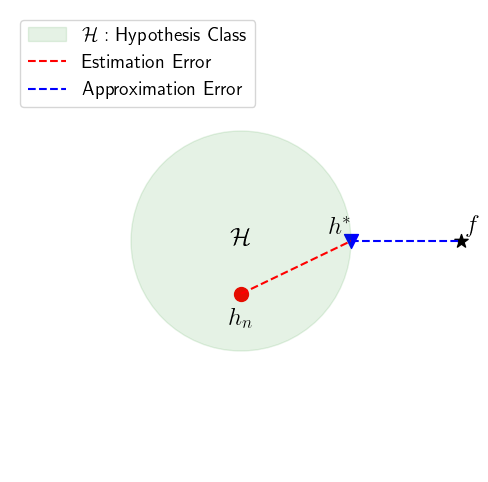

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect('equal')
ax.scatter( 0, -0.24, marker='o', color='r', s=100)
ax.scatter(0.5, 0, marker='v', color='b', s=100)
ax.scatter(1, 0, marker='*', color='k', s=100)
ax.add_artist(plt.Circle((0, 0), 0.5, color='green', fill=True, alpha=0.1, label='$\mathcal{H}:$ Hypothesis Class'))
ax.annotate('$h_n$', xy=(0, -0.25), xytext=(0, -0.35), ha='center', va='center')
ax.annotate('$h^*$', xy=(0.5, 0), xytext=(0.45, 0.06), ha='center', va='center')
ax.annotate('$f$', xy=(1, 0), xytext=(1.05, 0.07), ha='center', va='center')
ax.text(0, 0, r'$\mathcal{H}$', ha='center', va='center')
ax.plot([0, 0.5], [-0.24, 0], '--', color='r', label='Estimation Error')
ax.plot([0.5, 1], [0, 0], '--', color='b', label='Approximation Error')
ax.legend(loc='upper left', fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('../figures/fig1.1.pdf', bbox_inches='tight')
plt.show()

### Date: September 28, 2023